In [1]:
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

# 회귀분석 패키지 
from statsmodels.formula.api import ols
# qqplot, 상수항 추가
from statsmodels.api import qqplot, add_constant
# 선형 모델 forumla(y ~ X1 + X2 + ...)
import statsmodels.formula.api as smf
# 평가함수 패키지
from statsmodels.tools.eval_measures import rmse
# jupyter notebook 사용 시 그래프 자동 출력 옵션
%matplotlib inline

import statsmodels.api as sm

# Raw Data 확인

In [2]:
matplotlib.rc('font',family='Malgun Gothic')
df_raw = pd.read_csv("C:/Users/Enok/python/project/health_data.csv" ,encoding="utf-8")
df_raw.head()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),...,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,구강검진 수검여부,치석
0,2016,5,2,6,11,160.0,50.0,67.0,0.4,0.5,...,130.0,12.8,1.0,0.7,13.0,7.0,20.0,1.0,0,NaN
1,2016,8,2,16,48,155.0,60.0,81.0,0.7,0.5,...,108.0,13.0,1.0,0.7,23.0,14.0,14.0,1.0,0,NaN
2,2016,29,2,9,11,155.0,60.0,83.0,1.0,1.0,...,116.0,12.7,1.0,0.8,21.0,20.0,55.0,1.0,0,NaN
3,2016,41,2,15,28,150.0,45.0,71.0,0.8,0.5,...,135.0,13.0,1.0,0.8,23.0,13.0,18.0,1.0,1,0.0
4,2016,56,2,12,26,145.0,55.0,75.0,1.2,1.2,...,160.0,13.9,1.0,0.7,87.0,246.0,99.0,1.0,0,NaN


In [3]:
df_raw.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '구강검진 수검여부', '치석'],
      dtype='object')

## 데이터 전처리(성별데이터 변환, 필요없는 열 제거)

In [4]:
#성별코드가 0,1 로 되어있어 컴퓨터가 연속형 데이터로 인식 -> 명목형 데이터로 변환 필욘
df_raw['성별'] = df_raw['성별코드'].replace(1,'남성').replace(2,'여성')
#필요없는 Column 제거
df_raw.drop(['기준년도', '가입자일련번호'],axis=1,inplace=True)
df_raw.head()

,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),...,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,구강검진 수검여부,치석,성별
0,2,6,11,160.0,50.0,67.0,0.4,0.5,1.0,1.0,...,12.8,1.0,0.7,13.0,7.0,20.0,1.0,0,NaN,여성
1,2,16,48,155.0,60.0,81.0,0.7,0.5,1.0,1.0,...,13.0,1.0,0.7,23.0,14.0,14.0,1.0,0,NaN,여성
2,2,9,11,155.0,60.0,83.0,1.0,1.0,1.0,1.0,...,12.7,1.0,0.8,21.0,20.0,55.0,1.0,0,NaN,여성
3,2,15,28,150.0,45.0,71.0,0.8,0.5,1.0,1.0,...,13.0,1.0,0.8,23.0,13.0,18.0,1.0,1,0.0,여성
4,2,12,26,145.0,55.0,75.0,1.2,1.2,1.0,1.0,...,13.9,1.0,0.7,87.0,246.0,99.0,1.0,0,NaN,여성


# 결측치 확인

In [5]:
#결측치 확인
df_raw.isnull().sum()


성별코드               0
연령대코드(5세단위)        0
시도코드               0
신장(5Cm단위)         51
체중(5Kg단위)         51
허리둘레              13
시력(좌)             19
시력(우)             19
청력(좌)             18
청력(우)             18
수축기혈압              8
이완기혈압              7
식전혈당(공복혈당)         3
총콜레스테롤             3
트리글리세라이드           3
HDL콜레스테롤           3
LDL콜레스테롤         181
혈색소                3
요단백              346
혈청크레아티닌            3
(혈청지오티)AST         3
(혈청지오티)ALT         3
감마지티피              3
흡연상태              18
구강검진 수검여부          0
치석             41700
성별                 0
dtype: int64

In [6]:
df_raw.describe().T

# 기술통계 요약결과 이상치가 존재하는 것으로 추정되는 변수는
# 허리둘레, 식전혈당, 총콜레스테롤, 트리글리세라이드, HDL, LDL, AST, ALT, 감마지티피로 추정

,count,mean,std,min,25%,50%,75%,max
성별코드,70000.0,1.464157,0.498717,1.0,1.0,1.0,2.0,2.0
연령대코드(5세단위),70000.0,10.452671,2.849530,5.0,8.0,10.0,12.0,18.0
시도코드,70000.0,33.663414,12.657922,11.0,27.0,41.0,44.0,49.0
신장(5Cm단위),69949.0,162.420835,9.344122,100.0,155.0,160.0,170.0,195.0
체중(5Kg단위),69949.0,63.179245,12.641269,25.0,55.0,60.0,70.0,155.0
허리둘레,69987.0,81.247746,18.273343,46.0,74.0,81.0,87.0,999.0
시력(좌),69981.0,0.982704,0.608197,0.1,0.7,1.0,1.2,9.9
시력(우),69981.0,0.977798,0.595856,0.1,0.7,1.0,1.2,9.9
청력(좌),69982.0,1.030979,0.173263,1.0,1.0,1.0,1.0,2.0
청력(우),69982.0,1.030408,0.171708,1.0,1.0,1.0,1.0,2.0


# 신장과 체중 결측치 처리

In [7]:
# 성별 기준 평균
df_raw.groupby('성별코드').mean()
#신장 남 168, 체중 남 69
#신장 여 155, 체중 여 55

,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,...,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,구강검진 수검여부,치석
성별코드,,,,,,,,,,,,,,,,,,,,,
1,10.245194,34.047749,168.60556,69.780289,84.707262,1.038775,1.035679,1.031144,1.030104,124.66552,...,114.263648,15.186160,1.096065,0.976578,27.651274,30.112403,48.837741,2.076870,0.436749,0.641048
2,10.692192,33.219722,155.28120,55.559012,77.252563,0.917954,0.910959,1.030789,1.030758,119.44297,...,114.607562,13.051608,1.088309,0.742340,23.428699,20.177845,23.271661,1.094374,0.366840,0.551053


In [8]:
# 신장 결측치를 남, 여 평균신장으로 대체 남:170, 여: 155

# 1. 조건에 맞는 칼럼을 새 변수에 저장
cond1 = (df_raw['성별코드'] ==1) &  (df_raw['신장(5Cm단위)'].isnull())
cond2 = (df_raw['성별코드'] ==2) &  (df_raw['신장(5Cm단위)'].isnull())

# 2. 기존 데이터에 새로운 칼럼 생성
df_raw['신장']=df_raw['신장(5Cm단위)']

# 3. 새로운 칼럼에 1 의 조건을 만족하는 항목에 새로운 값 입력
df_raw.loc[cond1,'신장']=170
df_raw.loc[cond2,'신장']=155

In [9]:
# 체중 결측치를 남, 여 평균체중으로 대체 남: 70 , 여 : 55

# 1. 조건에 맞는 칼럼을 새 변수에 저장
cond3 = (df_raw['성별코드'] ==1) &  (df_raw['체중(5Kg단위)'].isnull())
cond4 = (df_raw['성별코드'] ==2) &  (df_raw['체중(5Kg단위)'].isnull())

# 2. 기존 데이터에 새로운 칼럼 생성
df_raw['체중']=df_raw['체중(5Kg단위)']

# 3. 새로운 칼럼에 1 의 조건을 만족하는 항목에 새로운 값 입력
df_raw.loc[cond3,'체중']=70
df_raw.loc[cond4,'체중']=55


# 기존 칼럼 제거
df_raw = df_raw.drop(['신장(5Cm단위)','체중(5Kg단위)'], axis = 1)
df_raw.head()

,성별코드,연령대코드(5세단위),시도코드,허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,구강검진 수검여부,치석,성별,신장,체중
0,2,6,11,67.0,0.4,0.5,1.0,1.0,121.0,68.0,...,0.7,13.0,7.0,20.0,1.0,0,NaN,여성,160.0,50.0
1,2,16,48,81.0,0.7,0.5,1.0,1.0,130.0,70.0,...,0.7,23.0,14.0,14.0,1.0,0,NaN,여성,155.0,60.0
2,2,9,11,83.0,1.0,1.0,1.0,1.0,108.0,65.0,...,0.8,21.0,20.0,55.0,1.0,0,NaN,여성,155.0,60.0
3,2,15,28,71.0,0.8,0.5,1.0,1.0,135.0,70.0,...,0.8,23.0,13.0,18.0,1.0,1,0.0,여성,150.0,45.0
4,2,12,26,75.0,1.2,1.2,1.0,1.0,110.0,70.0,...,0.7,87.0,246.0,99.0,1.0,0,NaN,여성,145.0,55.0


# 혈청크레아티닌 결측치 처리

In [10]:
#혈청크레아티닌 결측치 총 3개 존재= > 전체 데이터셋에 비해 수가 적으므로 제거
df_raw[df_raw.혈청크레아티닌.isnull()]

,성별코드,연령대코드(5세단위),시도코드,허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,구강검진 수검여부,치석,성별,신장,체중
1173,2,16,31,68.0,0.1,0.1,1.0,1.0,113.0,59.0,...,NaN,NaN,NaN,NaN,1.0,0,NaN,여성,145.0,40.0
19862,1,9,11,70.0,0.7,1.2,1.0,1.0,160.0,100.0,...,NaN,NaN,NaN,NaN,3.0,1,2.0,남성,170.0,50.0
37260,2,7,11,94.0,0.8,0.5,1.0,1.0,135.0,80.0,...,NaN,NaN,NaN,NaN,1.0,1,0.0,여성,155.0,70.0


In [11]:
# 혈청 결측치 로우 제거
cond5 = ((df_raw['혈청크레아티닌'].isnull()))
df_raw = df_raw[~cond5]

In [12]:
#결측치 제거 확인
df_raw.isnull().sum()

성별코드               0
연령대코드(5세단위)        0
시도코드               0
허리둘레              13
시력(좌)             19
시력(우)             19
청력(좌)             18
청력(우)             18
수축기혈압              8
이완기혈압              7
식전혈당(공복혈당)         0
총콜레스테롤             0
트리글리세라이드           0
HDL콜레스테롤           0
LDL콜레스테롤         178
혈색소                0
요단백              346
혈청크레아티닌            0
(혈청지오티)AST         0
(혈청지오티)ALT         0
감마지티피              0
흡연상태              18
구강검진 수검여부          0
치석             41699
성별                 0
신장                 0
체중                 0
dtype: int64

# 허리둘레 이상치 제거 및 결측치 예측

In [13]:
# 허리둘레 이상치 확인
df_raw['허리둘레'].sort_values(ascending = [False])

15409    999.0
42676    999.0
61596    999.0
24885    999.0
64       999.0
1832     999.0
10565    999.0
62862    999.0
58637    999.0
37848    999.0
11746    999.0
57448    999.0
49014    999.0
18015    999.0
54132    999.0
39836    999.0
46019    999.0
35475    999.0
9025     999.0
66034    999.0
17728    144.0
39459    138.0
15265    136.0
1162     134.0
29217    130.0
7370     129.0
67308    129.0
36585    128.0
24933    128.0
22026    126.0
         ...  
6271      53.0
27315     53.0
69144     53.0
19284     53.0
40795     53.0
68793     53.0
28429     53.0
11553     53.0
2551      53.0
52149     53.0
61477     53.0
11519     53.0
46149     53.0
31132     52.0
26653     51.0
41785     51.0
49105     46.0
3298       NaN
3516       NaN
5783       NaN
11069      NaN
21687      NaN
26328      NaN
28328      NaN
33947      NaN
37514      NaN
48022      NaN
49583      NaN
50065      NaN
67314      NaN
Name: 허리둘레, Length: 69997, dtype: float64

In [14]:
df_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
성별코드,69997.0,1.464148,0.498717,1.0,1.0,1.0,2.0,2.0
연령대코드(5세단위),69997.0,10.452662,2.849478,5.0,8.0,10.0,12.0,18.0
시도코드,69997.0,33.664100,12.657609,11.0,27.0,41.0,44.0,49.0
허리둘레,69984.0,81.247914,18.273553,46.0,74.0,81.0,87.0,999.0
시력(좌),69978.0,0.982723,0.608200,0.1,0.7,1.0,1.2,9.9
시력(우),69978.0,0.977814,0.595856,0.1,0.7,1.0,1.2,9.9
청력(좌),69979.0,1.030981,0.173267,1.0,1.0,1.0,1.0,2.0
청력(우),69979.0,1.030409,0.171711,1.0,1.0,1.0,1.0,2.0
수축기혈압,69989.0,122.241166,14.558266,74.0,111.0,120.0,130.0,230.0
이완기혈압,69990.0,76.014059,9.882727,39.0,70.0,76.0,81.0,150.0


In [15]:
df_raw.허리둘레.quantile(0.1)

68.0

In [16]:
# 허리둘레 이상치를 결측치로 치환
df_raw['허리둘레'] =  df_raw['허리둘레'].replace(999, np.nan)

In [17]:
df_raw.isnull().sum()

성별코드               0
연령대코드(5세단위)        0
시도코드               0
허리둘레              33
시력(좌)             19
시력(우)             19
청력(좌)             18
청력(우)             18
수축기혈압              8
이완기혈압              7
식전혈당(공복혈당)         0
총콜레스테롤             0
트리글리세라이드           0
HDL콜레스테롤           0
LDL콜레스테롤         178
혈색소                0
요단백              346
혈청크레아티닌            0
(혈청지오티)AST         0
(혈청지오티)ALT         0
감마지티피              0
흡연상태              18
구강검진 수검여부          0
치석             41699
성별                 0
신장                 0
체중                 0
dtype: int64

In [18]:
# 각변수간 상관분석
df_raw.corr().round(3)

,성별코드,연령대코드(5세단위),시도코드,허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,...,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,구강검진 수검여부,치석,신장,체중
성별코드,1.000,0.078,-0.033,-0.415,-0.099,-0.104,-0.001,0.002,-0.179,-0.200,...,-0.009,-0.367,-0.087,-0.220,-0.253,-0.593,-0.071,-0.075,-0.711,-0.561
연령대코드(5세단위),0.078,1.000,0.030,0.173,-0.179,-0.188,0.207,0.200,0.269,0.124,...,0.038,0.047,0.060,-0.017,0.023,-0.130,-0.161,-0.036,-0.395,-0.187
시도코드,-0.033,0.030,1.000,0.027,0.015,0.017,0.004,0.003,0.029,0.031,...,-0.023,0.004,0.012,0.014,0.011,0.015,-0.058,0.006,-0.015,0.012
허리둘레,-0.415,0.173,0.027,1.000,0.004,0.004,0.038,0.034,0.348,0.310,...,0.048,0.178,0.116,0.313,0.232,0.246,-0.007,0.063,0.312,0.788
시력(좌),-0.099,-0.179,0.015,0.004,1.000,0.334,-0.050,-0.053,-0.031,0.001,...,-0.017,0.028,-0.002,0.029,0.011,0.070,0.020,0.020,0.141,0.090
시력(우),-0.104,-0.188,0.017,0.004,0.334,1.000,-0.047,-0.046,-0.027,0.010,...,-0.015,0.034,-0.003,0.025,0.015,0.067,0.021,0.017,0.146,0.094
청력(좌),-0.001,0.207,0.004,0.038,-0.050,-0.047,1.000,0.545,0.056,0.006,...,0.018,0.033,0.011,-0.010,0.001,-0.024,0.007,-0.020,-0.082,-0.049
청력(우),0.002,0.200,0.003,0.034,-0.053,-0.046,0.545,1.000,0.052,0.006,...,0.024,0.037,0.010,-0.010,-0.000,-0.027,0.007,-0.024,-0.083,-0.050
수축기혈압,-0.179,0.269,0.029,0.348,-0.031,-0.027,0.056,0.052,1.000,0.747,...,0.060,0.098,0.079,0.139,0.160,0.085,-0.067,0.040,0.032,0.253
이완기혈압,-0.200,0.124,0.031,0.310,0.001,0.010,0.006,0.006,0.747,1.000,...,0.042,0.088,0.076,0.155,0.173,0.122,-0.041,0.052,0.099,0.277


<Figure size 7200x7200 with 0 Axes>

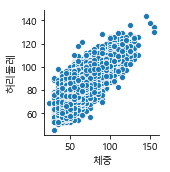

In [19]:
plt.figure(figsize=(100,100))
sns.pairplot(df_raw,y_vars = ['허리둘레'],x_vars='체중')

In [20]:
X = df_raw['체중']
Y = df_raw['허리둘레']
X = sm.add_constant(X)

model=sm.OLS(Y,X,missing='drop').fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   허리둘레   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                 1.149e+05
Date:                Sun, 19 May 2019   Prob (F-statistic):               0.00
Time:                        22:20:39   Log-Likelihood:            -2.2391e+05
No. Observations:               69964   AIC:                         4.478e+05
Df Residuals:                   69962   BIC:                         4.478e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         42.9465      0.114    375.220      0.000      42.722      43.171
체중             0.6021      0.002    338.929      0.000       0.599       0.606
==============================================================================
Omnibus:                     1930.181   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2264.259
Skew:                           0.367   Prob(JB):                         0.00
Kurtosis:                       3.488   Cond. No.                         329.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
pd = model.predict(X)
df_raw['허리둘레'] = df_raw['허리둘레'].fillna(pd)

In [22]:
print(df_raw.isnull().sum())

성별코드               0
연령대코드(5세단위)        0
시도코드               0
허리둘레               0
시력(좌)             19
시력(우)             19
청력(좌)             18
청력(우)             18
수축기혈압              8
이완기혈압              7
식전혈당(공복혈당)         0
총콜레스테롤             0
트리글리세라이드           0
HDL콜레스테롤           0
LDL콜레스테롤         178
혈색소                0
요단백              346
혈청크레아티닌            0
(혈청지오티)AST         0
(혈청지오티)ALT         0
감마지티피              0
흡연상태              18
구강검진 수검여부          0
치석             41699
성별                 0
신장                 0
체중                 0
dtype: int64


In [23]:
df_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
성별코드,69997.0,1.464148,0.498717,1.0,1.0,1.0,2.0,2.0
연령대코드(5세단위),69997.0,10.452662,2.849478,5.0,8.0,10.0,12.0,18.0
시도코드,69997.0,33.664100,12.657609,11.0,27.0,41.0,44.0,49.0
허리둘레,69997.0,80.984274,9.651188,46.0,74.0,81.0,87.0,144.0
시력(좌),69978.0,0.982723,0.608200,0.1,0.7,1.0,1.2,9.9
시력(우),69978.0,0.977814,0.595856,0.1,0.7,1.0,1.2,9.9
청력(좌),69979.0,1.030981,0.173267,1.0,1.0,1.0,1.0,2.0
청력(우),69979.0,1.030409,0.171711,1.0,1.0,1.0,1.0,2.0
수축기혈압,69989.0,122.241166,14.558266,74.0,111.0,120.0,130.0,230.0
이완기혈압,69990.0,76.014059,9.882727,39.0,70.0,76.0,81.0,150.0


## 이상치 확인 및 처리

In [24]:
# 허리둘레, 식전혈당, 총콜레스테롤, 트리글리세라이드, HDL, LDL, AST, ALT, 감마지티피

In [25]:
df_raw['식전혈당(공복혈당)'].sort_values(ascending = [False])
# 식전혈당 기준치에 대한 배경지식 필요

50392    619.0
7998     576.0
11553    567.0
23268    556.0
54585    493.0
53887    481.0
43874    451.0
19984    423.0
60964    423.0
3592     422.0
4073     410.0
64802    406.0
13211    387.0
2130     380.0
627      379.0
61426    371.0
4481     369.0
7913     368.0
59897    367.0
64693    365.0
9872     362.0
18037    361.0
69669    360.0
740      359.0
12410    359.0
36356    358.0
31067    358.0
38285    357.0
63151    356.0
50716    356.0
         ...  
53756     60.0
39832     60.0
51667     59.0
4464      58.0
43698     58.0
58009     58.0
821       58.0
59036     58.0
53766     57.0
15866     57.0
50190     56.0
6679      55.0
50597     55.0
21084     55.0
2147      54.0
44473     54.0
11605     53.0
18184     52.0
36175     52.0
18140     52.0
54940     51.0
6050      50.0
62101     50.0
59191     49.0
59767     49.0
38580     47.0
63082     46.0
746       41.0
139       40.0
20594     38.0
Name: 식전혈당(공복혈당), Length: 69997, dtype: float64

In [26]:
df_raw['총콜레스테롤'].sort_values(ascending = [False])
# 총 콜레스테롤 수치에 대한 배경지식 필요 
# 상위 4번째까지 값이 5번째보다 2배 이상 차이나니까 회귀분석으로 예측

9615     2337.0
5389     1940.0
9441     1554.0
64652    1514.0
14688     626.0
36472     533.0
67336     532.0
4740      453.0
62350     451.0
54080     445.0
8714      433.0
14649     426.0
45001     422.0
20646     411.0
3747      407.0
29235     406.0
52165     403.0
18028     401.0
65483     400.0
27015     400.0
57138     397.0
62172     396.0
22818     395.0
15487     392.0
53711     391.0
29965     391.0
67083     390.0
38514     385.0
40204     383.0
33375     381.0
          ...  
6917       91.0
27034      91.0
44243      90.0
57784      90.0
21359      90.0
14102      89.0
48891      89.0
24593      88.0
15917      88.0
5734       87.0
60990      87.0
2038       86.0
25379      86.0
67274      85.0
14569      85.0
36850      84.0
42010      84.0
24940      84.0
60484      84.0
39416      82.0
17553      77.0
46763      77.0
17418      76.0
29709      75.0
55342      75.0
53872      73.0
6500       68.0
49492      61.0
11113      58.0
25408      19.0
Name: 총콜레스테롤, Length: 69

In [27]:
df_raw['트리글리세라이드'].sort_values(ascending = [False])
# 이상치 없다고 판단 가능

57138    2559.0
64686    2275.0
54976    2179.0
67336    2175.0
45001    2165.0
7094     2055.0
35623    2030.0
43639    2018.0
20110    1975.0
17531    1902.0
29916    1885.0
14734    1868.0
66135    1847.0
57875    1754.0
42039    1685.0
66862    1677.0
46040    1638.0
54080    1558.0
16385    1540.0
44545    1537.0
54490    1534.0
35070    1507.0
45769    1488.0
18095    1473.0
65483    1449.0
36472    1447.0
33612    1433.0
17884    1420.0
33290    1404.0
38934    1400.0
          ...  
29560      21.0
5799       20.0
27395      20.0
5001       20.0
69465      20.0
26988      20.0
40278      20.0
65540      20.0
37999      20.0
23991      20.0
31610      19.0
41397      19.0
34644      19.0
55525      19.0
37869      18.0
50586      17.0
9787       17.0
37115      17.0
67320      17.0
57643      16.0
54150      15.0
20649      14.0
62730      14.0
24399      13.0
49398      13.0
21026      13.0
58491      12.0
11113       9.0
16002       3.0
49492       3.0
Name: 트리글리세라이드, Length: 

In [28]:
df_raw['HDL콜레스테롤'].sort_values(ascending = [False])
# 4652 이상치로 판단가능

6388     4652.0
13853     636.0
40097     618.0
69636     614.0
53618     613.0
657       605.0
44935     487.0
41848     471.0
12642     448.0
40790     411.0
5389      401.0
53367     325.0
845       172.0
1048      171.0
9252      167.0
49105     165.0
62227     162.0
49936     160.0
69497     156.0
35286     154.0
38041     152.0
9943      151.0
63514     150.0
44766     149.0
43249     147.0
14688     144.0
48815     144.0
64478     142.0
21545     140.0
69401     139.0
          ...  
497        21.0
44976      20.0
9676       20.0
45769      20.0
57681      20.0
38226      20.0
7094       20.0
37996      20.0
68238      20.0
63906      19.0
40788      19.0
66571      19.0
30603      18.0
63048      18.0
55628      18.0
30189      18.0
3792       17.0
30835      17.0
15897      17.0
62233      16.0
8731       15.0
1782       14.0
63418      14.0
35070      13.0
4179       13.0
11478      12.0
9441        7.0
9615        7.0
64652       6.0
65291       6.0
Name: HDL콜레스테롤, Length: 

In [29]:
df_raw['LDL콜레스테롤'].sort_values(ascending = [False])
# 1000이상을 이상치로 판단해 회귀 분석

9615     2286.0
58248    1616.0
9441     1531.0
64652    1491.0
8574     1480.0
59376    1470.0
34651    1340.0
68945    1056.0
50863     630.0
14649     345.0
27015     328.0
38514     325.0
39495     315.0
25389     309.0
18028     307.0
33375     303.0
3747      303.0
29235     299.0
8998      299.0
40204     292.0
62350     291.0
35236     291.0
21606     288.0
50027     282.0
39698     275.0
45581     275.0
53711     275.0
28381     274.0
2725      274.0
10052     273.0
          ...  
58811       NaN
58890       NaN
58959       NaN
59164       NaN
59308       NaN
59803       NaN
59894       NaN
59926       NaN
60197       NaN
60598       NaN
61153       NaN
61513       NaN
62041       NaN
62440       NaN
62450       NaN
63323       NaN
63514       NaN
63580       NaN
64547       NaN
64613       NaN
65279       NaN
65813       NaN
65979       NaN
66466       NaN
67707       NaN
67778       NaN
68157       NaN
68165       NaN
69189       NaN
69497       NaN
Name: LDL콜레스테롤, Length: 

In [30]:
df_raw['(혈청지오티)ALT'].sort_values(ascending = [False])
# 간 안좋을때 1000이상도 가능하다고 하니까 이상치로 판단 X

60957    1400.0
59842    1174.0
9827     1107.0
22874     905.0
40830     782.0
154       670.0
46511     609.0
54860     586.0
60166     581.0
53367     555.0
48852     523.0
66290     521.0
18014     505.0
47897     459.0
32905     434.0
19851     406.0
57304     399.0
5095      374.0
15404     371.0
57649     369.0
52893     357.0
57754     347.0
57751     338.0
44764     335.0
36226     333.0
61529     308.0
56353     305.0
177       304.0
60836     301.0
11482     298.0
          ...  
49991       4.0
55781       4.0
41579       4.0
59798       4.0
39961       4.0
46754       4.0
8969        4.0
23405       4.0
17628       4.0
15702       4.0
22190       3.0
69957       3.0
47332       3.0
49845       3.0
4533        3.0
30624       3.0
19135       3.0
68651       3.0
66415       3.0
18754       3.0
36577       3.0
9855        3.0
920         3.0
44812       2.0
2932        2.0
47962       2.0
27746       2.0
44765       2.0
25893       2.0
60648       1.0
Name: (혈청지오티)ALT, Length

In [31]:
df_raw['감마지티피'].sort_values(ascending = [False])
# 이상치 판단 X

1782     999.0
29709    999.0
56920    999.0
64532    999.0
37997    999.0
50745    999.0
51147    999.0
4740     999.0
39567    999.0
17115    999.0
55346    999.0
29857    999.0
56722    999.0
21220    989.0
57086    981.0
9188     980.0
37590    980.0
32905    979.0
58126    963.0
29574    956.0
49774    955.0
5986     954.0
52990    953.0
60423    930.0
52917    926.0
6335     903.0
34294    903.0
22913    892.0
23645    890.0
41792    875.0
         ...  
922        4.0
53350      4.0
47559      4.0
9936       4.0
17323      4.0
42082      4.0
14200      4.0
39250      4.0
34783      4.0
39139      4.0
49720      4.0
60993      4.0
25176      4.0
39805      4.0
32295      4.0
1532       3.0
31999      3.0
69598      3.0
10107      3.0
23295      3.0
61276      3.0
65550      3.0
28557      3.0
38045      3.0
36443      3.0
48803      3.0
47350      3.0
7849       3.0
39377      3.0
30670      2.0
Name: 감마지티피, Length: 69997, dtype: float64

In [32]:
df_raw['(혈청지오티)AST'].sort_values(ascending = [False])
# 상위 3개 항목 이상치로 판단 

4740     3361.0
22874    2799.0
1608     1141.0
18014     914.0
9827      892.0
177       878.0
60957     852.0
59842     821.0
56353     733.0
40830     650.0
36226     586.0
9655      510.0
46511     506.0
41023     456.0
40142     446.0
54860     428.0
52584     419.0
154       418.0
64810     411.0
30863     405.0
58126     381.0
11969     377.0
66290     375.0
1782      356.0
13155     351.0
4447      347.0
69698     346.0
59755     345.0
50745     342.0
19851     340.0
          ...  
59135       8.0
17056       7.0
43488       7.0
65314       7.0
63183       7.0
55891       7.0
63960       7.0
22088       7.0
20931       7.0
8310        7.0
27683       7.0
32867       7.0
15371       6.0
33459       6.0
22215       6.0
66415       6.0
41547       6.0
21162       6.0
27390       6.0
43452       6.0
10657       6.0
55469       6.0
4631        5.0
42932       4.0
47624       4.0
9855        4.0
38154       3.0
34          2.0
14596       2.0
43071       1.0
Name: (혈청지오티)AST, Length

In [33]:
df_raw[df_raw['(혈청지오티)AST'] > 1000].T

,1608,4740,22874
성별코드,2,1,1
연령대코드(5세단위),12,11,8
시도코드,41,48,45
허리둘레,65,67,69
시력(좌),0.4,0.4,0.8
시력(우),0.7,0.7,0.8
청력(좌),1,1,1
청력(우),1,1,1
수축기혈압,120,120,113
이완기혈압,80,70,72


In [34]:
# 상관계수를 구하기 위해 필요 변수만 추출
df_corr = df_raw[ ['성별코드','연령대코드(5세단위)','허리둘레','수축기혈압','이완기혈압','식전혈당(공복혈당)',
                  '총콜레스테롤','트리글리세라이드','HDL콜레스테롤','LDL콜레스테롤','혈색소','요단백','혈청크레아티닌',
                  '(혈청지오티)AST','(혈청지오티)ALT','감마지티피','흡연상태','신장','체중']]


df_corr.corr().round(3)

#  상관관계가 존재하는 변수 : 총콜레스테롤, LDL콜레스테롤, 혈청지오티AST
#  상관관계라 존재하지 않는 변수 : HDL콜레스테롤 

,성별코드,연령대코드(5세단위),허리둘레,수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,신장,체중
성별코드,1.000,0.078,-0.415,-0.179,-0.200,-0.107,0.021,-0.211,0.176,0.005,-0.659,-0.009,-0.367,-0.087,-0.220,-0.253,-0.593,-0.711,-0.561
연령대코드(5세단위),0.078,1.000,0.173,0.269,0.124,0.208,0.031,0.050,-0.069,0.047,-0.184,0.038,0.047,0.060,-0.017,0.023,-0.130,-0.395,-0.187
허리둘레,-0.415,0.173,1.000,0.348,0.310,0.222,0.086,0.305,-0.221,0.087,0.346,0.048,0.178,0.116,0.313,0.232,0.246,0.312,0.788
수축기혈압,-0.179,0.269,0.348,1.000,0.747,0.188,0.079,0.188,-0.081,0.046,0.165,0.060,0.098,0.079,0.139,0.160,0.085,0.032,0.253
이완기혈압,-0.200,0.124,0.310,0.747,1.000,0.140,0.108,0.198,-0.071,0.068,0.236,0.042,0.088,0.076,0.155,0.173,0.122,0.099,0.277
식전혈당(공복혈당),-0.107,0.208,0.222,0.188,0.140,1.000,0.030,0.208,-0.080,-0.009,0.085,0.109,0.072,0.074,0.134,0.170,0.069,0.006,0.132
총콜레스테롤,0.021,0.031,0.086,0.079,0.108,0.030,1.000,0.271,0.105,0.861,0.117,-0.000,-0.009,0.041,0.085,0.089,0.011,-0.033,0.067
트리글리세라이드,-0.211,0.050,0.305,0.188,0.198,0.208,0.271,1.000,-0.221,0.021,0.232,0.039,0.082,0.143,0.225,0.310,0.215,0.124,0.277
HDL콜레스테롤,0.176,-0.069,-0.221,-0.081,-0.071,-0.080,0.105,-0.221,1.000,-0.053,-0.126,-0.016,-0.088,-0.027,-0.094,-0.038,-0.119,-0.097,-0.200
LDL콜레스테롤,0.005,0.047,0.087,0.046,0.068,-0.009,0.861,0.021,-0.053,1.000,0.098,-0.010,0.004,0.003,0.051,-0.015,-0.011,-0.024,0.069


# 총콜레스테롤 이상치 처리 

In [35]:
df_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
성별코드,69997.0,1.464148,0.498717,1.0,1.0,1.0,2.0,2.0
연령대코드(5세단위),69997.0,10.452662,2.849478,5.0,8.0,10.0,12.0,18.0
시도코드,69997.0,33.664100,12.657609,11.0,27.0,41.0,44.0,49.0
허리둘레,69997.0,80.984274,9.651188,46.0,74.0,81.0,87.0,144.0
시력(좌),69978.0,0.982723,0.608200,0.1,0.7,1.0,1.2,9.9
시력(우),69978.0,0.977814,0.595856,0.1,0.7,1.0,1.2,9.9
청력(좌),69979.0,1.030981,0.173267,1.0,1.0,1.0,1.0,2.0
청력(우),69979.0,1.030409,0.171711,1.0,1.0,1.0,1.0,2.0
수축기혈압,69989.0,122.241166,14.558266,74.0,111.0,120.0,130.0,230.0
이완기혈압,69990.0,76.014059,9.882727,39.0,70.0,76.0,81.0,150.0


In [36]:
df_raw['총콜레스테롤'].sort_values(ascending = [False])

9615     2337.0
5389     1940.0
9441     1554.0
64652    1514.0
14688     626.0
36472     533.0
67336     532.0
4740      453.0
62350     451.0
54080     445.0
8714      433.0
14649     426.0
45001     422.0
20646     411.0
3747      407.0
29235     406.0
52165     403.0
18028     401.0
65483     400.0
27015     400.0
57138     397.0
62172     396.0
22818     395.0
15487     392.0
53711     391.0
29965     391.0
67083     390.0
38514     385.0
40204     383.0
33375     381.0
          ...  
6917       91.0
27034      91.0
44243      90.0
57784      90.0
21359      90.0
14102      89.0
48891      89.0
24593      88.0
15917      88.0
5734       87.0
60990      87.0
2038       86.0
25379      86.0
67274      85.0
14569      85.0
36850      84.0
42010      84.0
24940      84.0
60484      84.0
39416      82.0
17553      77.0
46763      77.0
17418      76.0
29709      75.0
55342      75.0
53872      73.0
6500       68.0
49492      61.0
11113      58.0
25408      19.0
Name: 총콜레스테롤, Length: 69

In [37]:

# 1. 조건에 맞는 칼럼을 새 변수에 저장

cond3 = (df_raw['총콜레스테롤'] > 1000)


# 3. 새로운 칼럼에 1 의 조건을 만족하는 항목에 새로운 값 입력
df_raw.loc[cond3,'총콜레스테롤']=np.nan

In [38]:
df_raw['총콜레스테롤'].sort_values(ascending = [False])

14688    626.0
36472    533.0
67336    532.0
4740     453.0
62350    451.0
54080    445.0
8714     433.0
14649    426.0
45001    422.0
20646    411.0
3747     407.0
29235    406.0
52165    403.0
18028    401.0
65483    400.0
27015    400.0
57138    397.0
62172    396.0
22818    395.0
15487    392.0
53711    391.0
29965    391.0
67083    390.0
38514    385.0
40204    383.0
33375    381.0
35236    380.0
42039    379.0
8744     378.0
61218    376.0
         ...  
21359     90.0
48891     89.0
14102     89.0
15917     88.0
24593     88.0
60990     87.0
5734      87.0
2038      86.0
25379     86.0
14569     85.0
67274     85.0
36850     84.0
60484     84.0
42010     84.0
24940     84.0
39416     82.0
46763     77.0
17553     77.0
17418     76.0
29709     75.0
55342     75.0
53872     73.0
6500      68.0
49492     61.0
11113     58.0
25408     19.0
5389       NaN
9441       NaN
9615       NaN
64652      NaN
Name: 총콜레스테롤, Length: 69997, dtype: float64

# HDL콜레스테롤 결측치 처리

In [39]:
df_raw['HDL콜레스테롤'].sort_values(ascending = [False])

6388     4652.0
13853     636.0
40097     618.0
69636     614.0
53618     613.0
657       605.0
44935     487.0
41848     471.0
12642     448.0
40790     411.0
5389      401.0
53367     325.0
845       172.0
1048      171.0
9252      167.0
49105     165.0
62227     162.0
49936     160.0
69497     156.0
35286     154.0
38041     152.0
9943      151.0
63514     150.0
44766     149.0
43249     147.0
14688     144.0
48815     144.0
64478     142.0
21545     140.0
69401     139.0
          ...  
497        21.0
44976      20.0
9676       20.0
45769      20.0
57681      20.0
38226      20.0
7094       20.0
37996      20.0
68238      20.0
63906      19.0
40788      19.0
66571      19.0
30603      18.0
63048      18.0
55628      18.0
30189      18.0
3792       17.0
30835      17.0
15897      17.0
62233      16.0
8731       15.0
1782       14.0
63418      14.0
35070      13.0
4179       13.0
11478      12.0
9441        7.0
9615        7.0
64652       6.0
65291       6.0
Name: HDL콜레스테롤, Length: 

In [40]:
df_raw = df_raw[df_raw['HDL콜레스테롤']<1000]

# LDL콜레스테롤 결측치 이상치 처리

In [41]:
df_raw['LDL콜레스테롤'].sort_values(ascending = [False])

9615     2286.0
58248    1616.0
9441     1531.0
64652    1491.0
8574     1480.0
59376    1470.0
34651    1340.0
68945    1056.0
50863     630.0
14649     345.0
27015     328.0
38514     325.0
39495     315.0
25389     309.0
18028     307.0
33375     303.0
3747      303.0
29235     299.0
8998      299.0
40204     292.0
62350     291.0
35236     291.0
21606     288.0
50027     282.0
39698     275.0
45581     275.0
53711     275.0
28381     274.0
2725      274.0
10052     273.0
          ...  
58811       NaN
58890       NaN
58959       NaN
59164       NaN
59308       NaN
59803       NaN
59894       NaN
59926       NaN
60197       NaN
60598       NaN
61153       NaN
61513       NaN
62041       NaN
62440       NaN
62450       NaN
63323       NaN
63514       NaN
63580       NaN
64547       NaN
64613       NaN
65279       NaN
65813       NaN
65979       NaN
66466       NaN
67707       NaN
67778       NaN
68157       NaN
68165       NaN
69189       NaN
69497       NaN
Name: LDL콜레스테롤, Length: 

In [42]:

# 1. 조건에 맞는 칼럼을 새 변수에 저장

cond3 = (df_raw['LDL콜레스테롤'] > 500)



# 3. 새로운 칼럼에 1 의 조건을 만족하는 항목에 새로운 값 입력
df_raw.loc[cond3,'LDL콜레스테롤']=np.nan

C:\Users\Enok\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [43]:
df_raw['LDL콜레스테롤'].sort_values(ascending = [False])

14649    345.0
27015    328.0
38514    325.0
39495    315.0
25389    309.0
18028    307.0
3747     303.0
33375    303.0
29235    299.0
8998     299.0
40204    292.0
35236    291.0
62350    291.0
21606    288.0
50027    282.0
39698    275.0
53711    275.0
45581    275.0
28381    274.0
2725     274.0
10052    273.0
8714     273.0
32402    272.0
9941     272.0
18798    272.0
20646    271.0
32772    269.0
8430     269.0
50867    269.0
6164     268.0
         ...  
59164      NaN
59308      NaN
59376      NaN
59803      NaN
59894      NaN
59926      NaN
60197      NaN
60598      NaN
61153      NaN
61513      NaN
62041      NaN
62440      NaN
62450      NaN
63323      NaN
63514      NaN
63580      NaN
64547      NaN
64613      NaN
64652      NaN
65279      NaN
65813      NaN
65979      NaN
66466      NaN
67707      NaN
67778      NaN
68157      NaN
68165      NaN
68945      NaN
69189      NaN
69497      NaN
Name: LDL콜레스테롤, Length: 69996, dtype: float64

# 총콜레스테롤과 LDL콜레스테롤 간의 관계 확인

<Figure size 2880x2880 with 0 Axes>

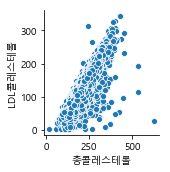

In [44]:
# LDL콜레스테롤과 총콜레스테롤 상관관계 확인
#산점도 행렬: 목표변수와 설명변수 지정
plt.figure(figsize=(40,40))
sns.pairplot(df_raw,y_vars = ['LDL콜레스테롤'],x_vars='총콜레스테롤')

# 총콜레스테롤, LDL콜레스테롤 이상치 및 결측치 회귀분석으로 예측

In [45]:
## 회귀분석으로 LDL콜레스테롤 회귀식 도출

X1 = df_raw['총콜레스테롤']
Y1= df_raw['LDL콜레스테롤']
X1 = sm.add_constant(X1)

model_ldl=sm.OLS(Y1,X1,missing='drop').fit()
model_ldl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               LDL콜레스테롤   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                 2.677e+05
Date:                Sun, 19 May 2019   Prob (F-statistic):               0.00
Time:                        22:20:43   Log-Likelihood:            -2.9104e+05
No. Observations:               69810   AIC:                         5.821e+05
Df Residuals:                   69808   BIC:                         5.821e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -43.6304      0.311   -140.359      0.000     -44.240     -43.021
총콜레스테롤         0.8059      0.002    517.388      0.000       0.803       0.809
==============================================================================
Omnibus:                    32927.699   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           965497.871
Skew:                          -1.680   Prob(JB):                         0.00
Kurtosis:                      20.906   Cond. No.                     1.05e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
## 회귀분석으로 LDL콜레스테롤 회귀식 도출

X2 = df_raw['LDL콜레스테롤']
Y2= df_raw['총콜레스테롤']
X2 = sm.add_constant(X2)

model_total =sm.OLS(Y2,X2, missing='drop').fit()
model_total.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 총콜레스테롤   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                 2.677e+05
Date:                Sun, 19 May 2019   Prob (F-statistic):               0.00
Time:                        22:20:43   Log-Likelihood:            -2.9802e+05
No. Observations:               69810   AIC:                         5.960e+05
Df Residuals:                   69808   BIC:                         5.961e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         83.4583      0.227    367.719      0.000      83.013      83.903
LDL콜레스테롤       0.9841      0.002    517.388      0.000       0.980       0.988
==============================================================================
Omnibus:                    38243.762   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1642957.678
Skew:                           1.968   Prob(JB):                         0.00
Kurtosis:                      26.438   Cond. No.                         414.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
pd1 = model_ldl.predict(X1)

df_raw['LDL콜레스테롤'] = df_raw['LDL콜레스테롤'].fillna(pd1)

C:\Users\Enok\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [48]:
pd2 = model_total.predict(X2)

df_raw['총콜레스테롤'] = df_raw['총콜레스테롤'].fillna(pd2)


C:\Users\Enok\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [49]:
#LDL콜레스테롤 결측치 처리 후 결측치 확인
df_raw.isnull().sum()

성별코드               0
연령대코드(5세단위)        0
시도코드               0
허리둘레               0
시력(좌)             19
시력(우)             19
청력(좌)             18
청력(우)             18
수축기혈압              8
이완기혈압              7
식전혈당(공복혈당)         0
총콜레스테롤             4
트리글리세라이드           0
HDL콜레스테롤           0
LDL콜레스테롤           4
혈색소                0
요단백              346
혈청크레아티닌            0
(혈청지오티)AST         0
(혈청지오티)ALT         0
감마지티피              0
흡연상태              18
구강검진 수검여부          0
치석             41698
성별                 0
신장                 0
체중                 0
dtype: int64

In [50]:
df_raw[df_raw['총콜레스테롤'].isnull()].T
# 총콜레스테롤, LDL콜레스테롤이 모두 결측값인 열만 제거

,5389,9441,9615,64652
성별코드,2,2,1,1
연령대코드(5세단위),10,17,8,13
시도코드,29,41,28,41
허리둘레,77,80,97,84
시력(좌),1.2,0.9,1.5,0.9
시력(우),1,0.7,0.8,1
청력(좌),1,1,1,1
청력(우),1,1,1,1
수축기혈압,119,120,165,142
이완기혈압,70,70,100,75


In [51]:
cond_col = ((df_raw['총콜레스테롤'].isnull()))
df_raw = df_raw[~cond_col]

In [52]:
df_raw.isnull().sum()

성별코드               0
연령대코드(5세단위)        0
시도코드               0
허리둘레               0
시력(좌)             19
시력(우)             19
청력(좌)             18
청력(우)             18
수축기혈압              8
이완기혈압              7
식전혈당(공복혈당)         0
총콜레스테롤             0
트리글리세라이드           0
HDL콜레스테롤           0
LDL콜레스테롤           0
혈색소                0
요단백              346
혈청크레아티닌            0
(혈청지오티)AST         0
(혈청지오티)ALT         0
감마지티피              0
흡연상태              18
구강검진 수검여부          0
치석             41694
성별                 0
신장                 0
체중                 0
dtype: int64

# (혈청지오티)ALT 이상치 처리

In [53]:
df_raw['(혈청지오티)ALT'].sort_values(ascending = [False])

60957    1400.0
59842    1174.0
9827     1107.0
22874     905.0
40830     782.0
154       670.0
46511     609.0
54860     586.0
60166     581.0
53367     555.0
48852     523.0
66290     521.0
18014     505.0
47897     459.0
32905     434.0
19851     406.0
57304     399.0
5095      374.0
15404     371.0
57649     369.0
52893     357.0
57754     347.0
57751     338.0
44764     335.0
36226     333.0
61529     308.0
56353     305.0
177       304.0
60836     301.0
11482     298.0
          ...  
41579       4.0
58299       4.0
23696       4.0
46021       4.0
46754       4.0
13297       4.0
59798       4.0
59719       4.0
49991       4.0
63013       4.0
19135       3.0
22190       3.0
47332       3.0
49845       3.0
69957       3.0
9855        3.0
920         3.0
36577       3.0
66415       3.0
68651       3.0
4533        3.0
30624       3.0
18754       3.0
44812       2.0
44765       2.0
27746       2.0
25893       2.0
2932        2.0
47962       2.0
60648       1.0
Name: (혈청지오티)ALT, Length

# 요단백 결측치 처리

In [54]:
#요단백처리 => 대부분 값이 1이므로 결측치 값을 1로 대체
asd = df_raw['요단백'].fillna(1)
df_raw['요단백'] = asd

C:\Users\Enok\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [55]:
#결측치 확인
df_raw.isnull().sum()

성별코드               0
연령대코드(5세단위)        0
시도코드               0
허리둘레               0
시력(좌)             19
시력(우)             19
청력(좌)             18
청력(우)             18
수축기혈압              8
이완기혈압              7
식전혈당(공복혈당)         0
총콜레스테롤             0
트리글리세라이드           0
HDL콜레스테롤           0
LDL콜레스테롤           0
혈색소                0
요단백                0
혈청크레아티닌            0
(혈청지오티)AST         0
(혈청지오티)ALT         0
감마지티피              0
흡연상태              18
구강검진 수검여부          0
치석             41694
성별                 0
신장                 0
체중                 0
dtype: int64

# 수축, 이완기 혈압 결측치 처리

In [56]:
df_raw['수축기혈압'].sort_values(ascending = [False])

42421    230.0
22823    220.0
55140    216.0
18551    215.0
14912    215.0
16374    214.0
27544    210.0
23509    210.0
846      210.0
26082    209.0
65106    208.0
23975    207.0
40463    207.0
27299    206.0
55043    203.0
30637    202.0
48716    202.0
49603    202.0
43418    200.0
33561    200.0
6586     200.0
27999    200.0
13457    200.0
14706    200.0
45886    200.0
48620    200.0
69680    200.0
35468    200.0
33983    197.0
3223     196.0
         ...  
5905      82.0
33469     82.0
858       81.0
49708     81.0
63979     81.0
60440     81.0
6960      81.0
44886     81.0
24528     81.0
23142     80.0
67967     80.0
56029     80.0
59732     80.0
52575     80.0
7238      80.0
53469     80.0
4207      79.0
21637     79.0
53663     77.0
49693     77.0
15806     77.0
23251     74.0
3298       NaN
3516       NaN
11069      NaN
24092      NaN
33947      NaN
52058      NaN
63721      NaN
67314      NaN
Name: 수축기혈압, Length: 69992, dtype: float64

In [57]:
df_raw['이완기혈압'].sort_values(ascending = [False])

22823    150.0
18       145.0
64260    140.0
69680    140.0
55140    138.0
31230    137.0
15741    135.0
42383    130.0
387      130.0
24161    130.0
34499    130.0
56873    130.0
52174    130.0
10815    130.0
43956    130.0
50890    128.0
35761    128.0
13808    128.0
13387    127.0
26082    126.0
24009    125.0
7370     125.0
50631    124.0
47145    124.0
37628    123.0
9340     122.0
54435    122.0
34490    122.0
26615    122.0
40221    121.0
         ...  
6818      50.0
30540     50.0
3371      49.0
17592     49.0
55872     48.0
4940      48.0
63215     48.0
12077     48.0
53663     48.0
40215     48.0
38474     47.0
9601      47.0
3839      47.0
67437     46.0
27865     46.0
21637     46.0
30094     46.0
62888     46.0
67967     44.0
59216     44.0
49693     44.0
66027     42.0
6987      39.0
3298       NaN
3516       NaN
11069      NaN
33947      NaN
52058      NaN
63721      NaN
67314      NaN
Name: 이완기혈압, Length: 69992, dtype: float64

In [58]:
df_raw[df_raw['수축기혈압'].isnull()]

,성별코드,연령대코드(5세단위),시도코드,허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,구강검진 수검여부,치석,성별,신장,체중
3298,2,15,42,76.059624,NaN,NaN,1.0,1.0,NaN,NaN,...,0.8,99.0,52.0,49.0,1.0,0,NaN,여성,155.0,55.0
3516,2,18,27,76.059624,NaN,NaN,NaN,NaN,NaN,NaN,...,0.6,19.0,11.0,19.0,1.0,0,NaN,여성,155.0,55.0
11069,2,12,42,76.059624,NaN,NaN,1.0,1.0,NaN,NaN,...,0.7,14.0,24.0,36.0,3.0,0,NaN,여성,155.0,55.0
24092,2,13,11,78.000000,0.8,1.0,2.0,1.0,NaN,63.0,...,0.7,41.0,44.0,24.0,1.0,1,0.0,여성,150.0,50.0
33947,2,13,41,76.059624,NaN,NaN,NaN,NaN,NaN,NaN,...,0.7,12.0,22.0,19.0,1.0,0,NaN,여성,150.0,55.0
52058,2,14,26,90.000000,0.6,0.6,2.0,2.0,NaN,NaN,...,0.8,23.0,18.0,35.0,3.0,0,NaN,여성,150.0,50.0
63721,2,13,43,59.000000,9.9,9.9,NaN,NaN,NaN,NaN,...,0.9,19.0,12.0,15.0,1.0,0,NaN,여성,150.0,35.0
67314,2,18,43,76.059624,NaN,NaN,NaN,NaN,NaN,NaN,...,0.7,16.0,7.0,10.0,1.0,0,NaN,여성,155.0,55.0


In [59]:
cond_pressure = ((df_raw['이완기혈압'].isnull()))
df_raw = df_raw[~cond_pressure]
df_raw[df_raw['수축기혈압'].isnull()]

,성별코드,연령대코드(5세단위),시도코드,허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,구강검진 수검여부,치석,성별,신장,체중
24092,2,13,11,78.0,0.8,1.0,2.0,1.0,NaN,63.0,...,0.7,41.0,44.0,24.0,1.0,1,0.0,여성,150.0,50.0


In [60]:
## 회귀분석으로 LDL콜레스테롤 회귀식 도출

X3 = df_raw['이완기혈압']
Y3= df_raw['수축기혈압']
X3 = sm.add_constant(X3)

model_pressure =sm.OLS(Y3,X3, missing='drop').fit()
model_pressure.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  수축기혈압   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                 8.853e+04
Date:                Sun, 19 May 2019   Prob (F-statistic):               0.00
Time:                        22:20:55   Log-Likelihood:            -2.5812e+05
No. Observations:               69984   AIC:                         5.162e+05
Df Residuals:                   69982   BIC:                         5.163e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         38.5596      0.284    135.957      0.000      38.004      39.115
이완기혈압          1.1009      0.004    297.533      0.000       1.094       1.108
==============================================================================
Omnibus:                     7288.028   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15262.097
Skew:                           0.665   Prob(JB):                         0.00
Kurtosis:                       4.861   Cond. No.                         595.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
pd3 = model_total.predict(X3)

df_raw['수축기혈압'] = df_raw['수축기혈압'].fillna(pd3)

In [62]:
df_raw.isnull().sum()

성별코드               0
연령대코드(5세단위)        0
시도코드               0
허리둘레               0
시력(좌)             14
시력(우)             14
청력(좌)             14
청력(우)             14
수축기혈압              0
이완기혈압              0
식전혈당(공복혈당)         0
총콜레스테롤             0
트리글리세라이드           0
HDL콜레스테롤           0
LDL콜레스테롤           0
혈색소                0
요단백                0
혈청크레아티닌            0
(혈청지오티)AST         0
(혈청지오티)ALT         0
감마지티피              0
흡연상태              18
구강검진 수검여부          0
치석             41687
성별                 0
신장                 0
체중                 0
dtype: int64

# 파생변수 생성

## 파생변수(BMI)

In [63]:
#신장과 체중을 이용해서 BMI 계산
height=df_raw['신장']/100
weight=df_raw['체중']
bmi=weight/height**2

df_raw["BMI"]=bmi

## 파생변수(당뇨 발생 여부)

In [62]:
#파생변수 (당뇨 여부)
cond1 = (df_raw['식전혈당(공복혈당)'] < 126)

df_raw.loc[cond1, '당뇨여부']=0 
df_raw.loc[~cond1, '당뇨여부']=1
df_raw[['식전혈당(공복혈당)','당뇨여부']]
df_raw

,성별코드,연령대코드(5세단위),시도코드,허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,...,(혈청지오티)ALT,감마지티피,흡연상태,구강검진 수검여부,치석,성별,신장,체중,BMI,당뇨여부
0,2,6,11,67.0,0.4,0.5,1.0,1.0,121.0,68.0,...,7.0,20.0,1.0,0,NaN,여성,160.0,50.0,19.531250,0.0
1,2,16,48,81.0,0.7,0.5,1.0,1.0,130.0,70.0,...,14.0,14.0,1.0,0,NaN,여성,155.0,60.0,24.973985,0.0
2,2,9,11,83.0,1.0,1.0,1.0,1.0,108.0,65.0,...,20.0,55.0,1.0,0,NaN,여성,155.0,60.0,24.973985,0.0
3,2,15,28,71.0,0.8,0.5,1.0,1.0,135.0,70.0,...,13.0,18.0,1.0,1,0.0,여성,150.0,45.0,20.000000,0.0
4,2,12,26,75.0,1.2,1.2,1.0,1.0,110.0,70.0,...,246.0,99.0,1.0,0,NaN,여성,145.0,55.0,26.159334,0.0
5,1,8,11,95.0,1.5,1.0,1.0,1.0,115.0,67.0,...,31.0,68.0,3.0,0,NaN,남성,175.0,90.0,29.387755,0.0
6,2,16,46,74.0,0.7,0.4,1.0,1.0,145.0,90.0,...,13.0,16.0,1.0,0,NaN,여성,145.0,40.0,19.024970,0.0
7,1,11,41,76.0,1.0,1.0,1.0,1.0,126.0,70.0,...,12.0,41.0,1.0,1,2.0,남성,170.0,45.0,15.570934,0.0
8,2,8,47,89.0,1.5,1.5,1.0,1.0,96.0,55.0,...,15.0,15.0,1.0,0,NaN,여성,160.0,55.0,21.484375,0.0
9,2,15,48,59.0,1.5,1.2,1.0,1.0,116.0,78.0,...,15.0,17.0,3.0,0,NaN,여성,155.0,40.0,16.649324,0.0


## 파생변수(고혈압 여부)

### 고혈압 기준에 따라서 고혈압 정상, 고혈압 변수 생성 & 정상, 전 고혈압, 1단계 고혈압, 2단계 고혈압

#### 정상 120/80
#### 전고혈압 140/90
#### 1단계 160/100 
#### 2단계 160/100 이상

In [73]:
#파생변수 (고혈압 여부)
cond1 = (df_raw['수축기혈압'] <= 120) & (df_raw['이완기혈압'] <= 80)
cond2 = (df_raw['수축기혈압'] > 120) | (df_raw['이완기혈압'] > 80)

df_raw.loc[cond1, '고혈압여부']=0 
df_raw.loc[cond2, '고혈압여부']=1
df_raw.head().T

,0,1,2,3,4
성별코드,2,2,2,2,2
연령대코드(5세단위),6,16,9,15,12
시도코드,11,48,11,28,26
허리둘레,67,81,83,71,75
시력(좌),0.4,0.7,1,0.8,1.2
시력(우),0.5,0.5,1,0.5,1.2
청력(좌),1,1,1,1,1
청력(우),1,1,1,1,1
수축기혈압,121,130,108,135,110
이완기혈압,68,70,65,70,70


In [ ]:
정상 120/80
전고혈압 140/90
1단계 160/100 
2단계 160/100 이상

In [76]:
'''
#파생변수 (고혈압 여부)
cond1 = (df_raw['수축기혈압'] <= 120) & (df_raw['이완기혈압'] <= 80)
cond2 = (df_raw['수축기혈압'] < 140) & (df_raw['이완기혈압'] < 90)
cond3 = (df_raw['수축기혈압'] < 160) & (df_raw['이완기혈압'] < 100)
cond4 = (df_raw['수축기혈압'] > 160) & (df_raw['이완기혈압'] > 100)

df_raw.loc[cond1, '고혈압판정']= '정상'
df_raw.loc[cond2, '고혈압판정']= '전고혈압'
df_raw.loc[cond3, '고혈압판정']= '1단계'
df_raw.loc[cond4, '고혈압판정']= '2단계'

df_raw.head().T
'''

,0,1,2,3,4
성별코드,2,2,2,2,2
연령대코드(5세단위),6,16,9,15,12
시도코드,11,48,11,28,26
허리둘레,67,81,83,71,75
시력(좌),0.4,0.7,1,0.8,1.2
시력(우),0.5,0.5,1,0.5,1.2
청력(좌),1,1,1,1,1
청력(우),1,1,1,1,1
수축기혈압,121,130,108,135,110
이완기혈압,68,70,65,70,70


In [64]:
df_raw.head().T

,0,1,2,3,4
성별코드,2,2,2,2,2
연령대코드(5세단위),6,16,9,15,12
시도코드,11,48,11,28,26
허리둘레,67,81,83,71,75
시력(좌),0.4,0.7,1,0.8,1.2
시력(우),0.5,0.5,1,0.5,1.2
청력(좌),1,1,1,1,1
청력(우),1,1,1,1,1
수축기혈압,121,130,108,135,110
이완기혈압,68,70,65,70,70


In [66]:
df_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
성별코드,69985.0,1.464099,0.498713,1.000000,1.000000,1.000000,2.000000,2.000000
연령대코드(5세단위),69985.0,10.452111,2.849159,5.000000,8.000000,10.000000,12.000000,18.000000
시도코드,69985.0,33.663456,12.658252,11.000000,27.000000,41.000000,44.000000,49.000000
허리둘레,69985.0,80.984524,9.651272,46.000000,74.000000,81.000000,87.000000,144.000000
시력(좌),69971.0,0.982596,0.607289,0.100000,0.700000,1.000000,1.200000,9.900000
시력(우),69971.0,0.977698,0.594927,0.100000,0.700000,1.000000,1.200000,9.900000
청력(좌),69971.0,1.030970,0.173238,1.000000,1.000000,1.000000,1.000000,2.000000
청력(우),69971.0,1.030398,0.171682,1.000000,1.000000,1.000000,1.000000,2.000000
수축기혈압,69985.0,122.240858,14.557777,74.000000,111.000000,120.000000,130.000000,230.000000
이완기혈압,69985.0,76.013989,9.882585,39.000000,70.000000,76.000000,81.000000,150.000000
